In [1]:
!ls

Visualize B-cell epitopes.ipynb
accessible-epitopes-vs-mutations-and-glycosites.png
literature-linear-bcell-epitopes-04-28-2020.csv


In [2]:
df = pd.read_csv("literature-linear-bcell-epitopes-04-28-2020.csv")

In [3]:
df

,Source,Virus,Protein,Start,End,Animal,Isotype,Immunization,Monoclonal Name,In vitro function,Vaccine function,Notes,Sequence
0,Berry 2010,SARS,S,460,476,Human,IgG,Infection,F26G18,Neutralizing,NaN,54% identity with \nPCNGVEGFNCYFPLQSYGFQPTNGVG...,NaN
1,Berry 2010,SARS,S,612,620,Human,IgG,Infection,F26G8,Non-neutralizing,NaN,NaN,NaN
2,Hu 2005,SARS,S,471,503,Human,IgG,Infection,Polyclonal,Neutralizing,NaN,"binds ACE2, in RDB",NaN
3,Hu 2005,SARS,S,604,625,Human,IgG,Infection,Polyclonal,Non-neutralizing,NaN,"""high variability of S471-503 and \nS604-625 i...",NaN
4,Hu 2005,SARS,S,1164,1191,Human,IgG,Infection,Polyclonal,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Dahlke 2020,SARS-CoV-2,N,332,346,Human,IgA,Infection,Polyclonal,NaN,NaN,NaN,TYTGAIKLDDKDPNF
128,Dahlke 2020,SARS-CoV-2,N,380,394,Human,IgA,Infection,Polyclonal,NaN,NaN,NaN,QALPQRQKKQQTVTL
129,Dahlke 2020,SARS-CoV-2,N,176,206,Human,IgG,Infection,Polyclonal,NaN,NaN,NaN,SRGGSQASSRSSSRSRNSSRNSTPGSSRGTS
130,Dahlke 2020,SARS-CoV-2,N,366,382,Human,IgG,Infection,Polyclonal,NaN,NaN,NaN,TEPKKDKKKKADETQAL


In [4]:
df["length"] = df["End"] - df["Start"] + 1

In [5]:
df["length"].value_counts()

15     55
5      19
17      7
23      6
22      4
25      4
300     3
33      3
29      2
7       2
18      2
19      2
20      2
226     2
31      2
28      2
27      1
26      1
32      1
35      1
42      1
21      1
459     1
54      1
57      1
63      1
90      1
10      1
9       1
108     1
48      1
Name: length, dtype: int64

In [6]:
df["sequence_length"] = df["Sequence"].str.len()

In [7]:
# make sure all lengths match when sequence is present
# and all mismatching lengths are because sequence is missing
print(
    df[df["length"] == df["sequence_length"]]["Sequence"].isnull().mean(),
    df[df["length"] != df["sequence_length"]]["Sequence"].isnull().mean())
    

0.0 0.9722222222222222


In [8]:
# found a minor mistake in Wang 2020 peptide array paper
df[(df["length"] != df["sequence_length"]) & ~(df["Sequence"].isnull())]

,Source,Virus,Protein,Start,End,Animal,Isotype,Immunization,Monoclonal Name,In vitro function,Vaccine function,Notes,Sequence,length,sequence_length
57,Wang 2020,SARS-CoV-2,N,366,400,Human,"IgG, IgM",Infection,Polyclonal,NaN,NaN,IgM epitope is 386-QKKQQ-390,TEPKKDKKKKADETQALPQRQKKQQTVTLPAADL,35,34.0


In [9]:
df.Virus.value_counts()

SARS-CoV-2    97
SARS          35
Name: Virus, dtype: int64

In [10]:
df_sars2 = df[df.Virus == "SARS-CoV-2"];
df_sars2_S.to_csv("linear-bcell-epitopes-SARS2.csv", index=False);
df_sars2_S

In [11]:
df_sars2.Source.value_counts()

Charite 2020    37
Dahlke 2020     37
Wang 2020       21
Poh 2020         2
Name: Source, dtype: int64

In [12]:
df_sars2.Protein.value_counts()

S    54
N    32
M    11
Name: Protein, dtype: int64

In [13]:
df_sars2_S = df_sars2[df_sars2.Protein == "S"];
df_sars2_S.to_csv("linear-bcell-epitopes-SARS2-S.csv", index=False);
df_sars2_S

In [14]:
df_sars2_S.Source.value_counts()

Dahlke 2020     24
Charite 2020    20
Wang 2020        8
Poh 2020         2
Name: Source, dtype: int64

In [15]:
ls ../Figures/COVID

AA_mafft_df_entropy.txt*
AA_sequence.txt*
AA_sequence_combined.txt*
COVID_combined_entropy_rank_filtered.csv*
COVID_human_MARIA.txt*
COVID_human_netMHCIIpan_rank_filtered.txt*
COVID_human_netMHCpan_rank_filtered.txt*
COVID_murine_NetMHCIIpan_unfilt.xls
COVID_murine_NetMHCpan_unfilt.xls
HLA_freq.txt*
NetMHC_pan_out_rank/
NetMHCpan_out_filt/
PEPperPRINT_IgA.txt*
PEPperPRINT_IgA_DESeq2.txt*
PEPperPRINT_IgG.txt*
PEPperPRINT_IgG_DESeq2.txt*
PEPperPRINT_peptide_key.txt*
PEPperPRINT_sample_info.txt*
Supplemental/
Table_1.txt*
Translation_coords.txt*
ent_vs_prop.txt*
entropy_7882.txt*
filtered_cast_sars-cov-2.mhcflurry_predictions.csv*


Text(0.2, 0.2, 'A')

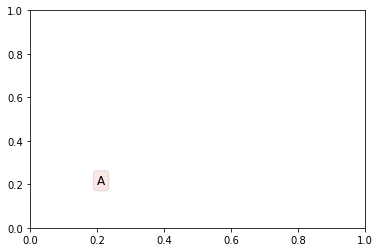

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.text(
    0.2, 0.2, "A", 
    backgroundcolor=(0.9, 0.1, 0.1, 0.1), 
    family='DejaVu Sans', 
    size=12, 
    fontweight=300,
    bbox=dict(boxstyle='round', facecolor=(0.9, 0.1, 0.1), alpha=0.1))

In [17]:
def parse_fasta(filename):
    result = {}
    with open(filename) as f:
        current_id = None
        lines = []
        for l in f:
            l = l.strip()
            if not l:
                continue
            elif l.startswith(">"):
                if current_id:
                    result[current_id] = "".join(lines)
                current_id = l[1:].split("|")[0]
                lines = []
            else:
                lines.append(l)
        if current_id:
            result[current_id] = "".join(lines)
        return result

proteome = parse_fasta("../Figures/COVID/AA_sequence.txt")

In [18]:
len(proteome["S"])

1273

In [19]:
S = proteome["S"]

Text(0.5, 0, 'Amino acid sequence of spike glycoprotein')

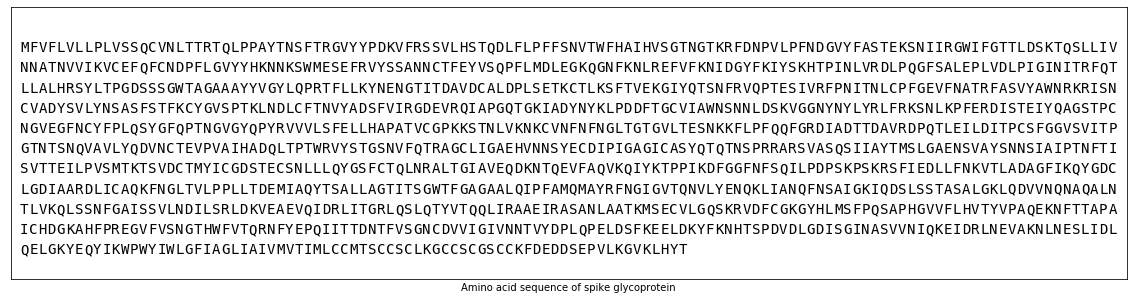

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt

S = proteome["S"]

fig = plt.figure(figsize=(20,5))
plt.xticks([])
plt.yticks([])

letters_per_line = 120
num_lines = len(S) // letters_per_line + 1
for i, letter in enumerate(S):
    line = i // letters_per_line
    x = (i % letters_per_line) / letters_per_line
    x_padded = (letters_per_line - 2) / letters_per_line * x + (1 / letters_per_line)
    y = 1.0 - (line + 1) / num_lines
    y_padded = y * (num_lines - 2) / num_lines + (1 / num_lines)
    plt.text(
        x=x_padded, 
        y=y_padded, 
        s=letter, 
        family='monospace', 
        size=14, 
        fontweight=300,
        bbox=dict(boxstyle='round', facecolor=(0.9, 0.1, 0.1), alpha=0.0))
plt.xlabel("Amino acid sequence of spike glycoprotein")

In [21]:
ls ../glycosylation/

glycosites-Watanabe.txt


Text(0.5, 0, 'Amino acid sequence of spike glycoprotein with D614 mutation highlighted')

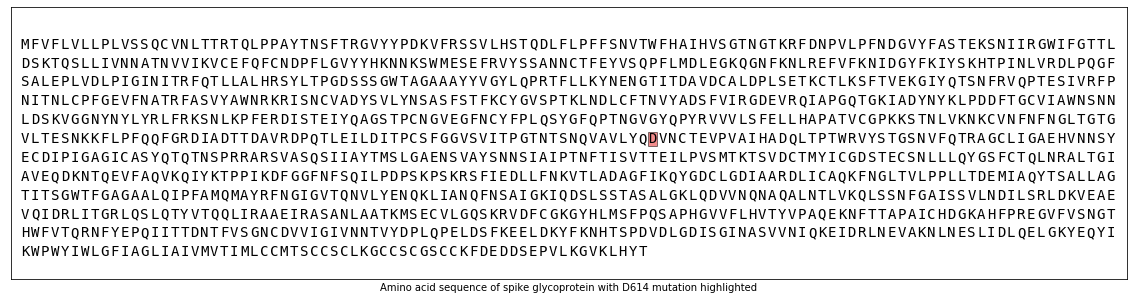

In [22]:

S = proteome["S"]

fig = plt.figure(figsize=(20,5))
plt.xticks([])
plt.yticks([])

letters_per_line = 110
num_lines = len(S) // letters_per_line + 1
for i, letter in enumerate(S):
    aa_num = i + 1
    line = i // letters_per_line
    x = (i % letters_per_line) / letters_per_line
    x_padded = (letters_per_line - 2) / letters_per_line * x + (1 / letters_per_line)
    y = 1.0 - (line + 1) / num_lines
    y_padded = y * (num_lines - 2) / num_lines + (1 / num_lines)
    alpha = 0.5 if aa_num == 614 else 0.0
    plt.text(
        x=x_padded, 
        y=y_padded, 
        s=letter, 
        family='monospace', 
        # backgroundcolor=(0.9, 0.1, 0.1, alpha),
        size=14, 
        fontweight=300,
        bbox=dict(boxstyle='square,pad=0', facecolor=(0.9, 0.1, 0.1), alpha=alpha))
plt.xlabel("Amino acid sequence of spike glycoprotein with D614 mutation highlighted")

Text(0.5, 0, 'Amino acid sequence of spike glycoprotein with D614 mutation and glycosites highlighted')

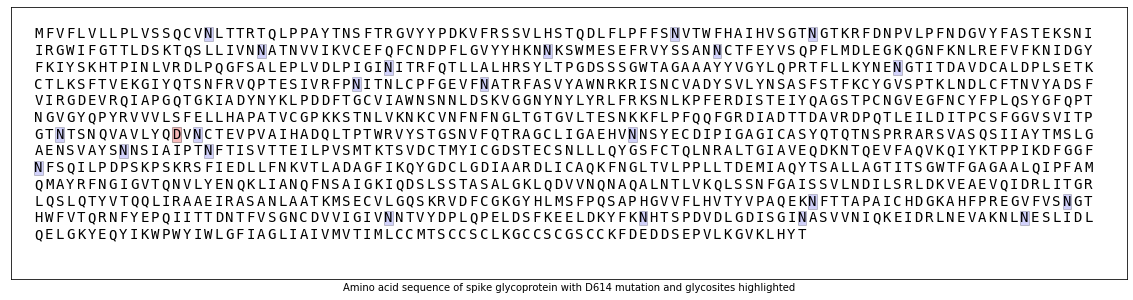

In [23]:

glycosites = set([])
with open("../glycosylation/glycosites-Watanabe.txt") as f:
    for l in f:
        l = l.strip()
        if l.startswith("#"):
            continue
        if not l:
            continue
        glycosites.add(int(l))

polymorphic_sites = {614}
S = proteome["S"]

fig = plt.figure(figsize=(20,5))
plt.xticks([])
plt.yticks([])

letters_per_line = 100
num_lines = len(S) // letters_per_line + 1
x_padding_percent = .05
y_padding_percent = .2

for i, letter in enumerate(S):
    aa_num = i + 1
    line = i // letters_per_line
    col = (i % letters_per_line)
    x =  col / letters_per_line
    
    x_padded = x * (1.0 - x_padding_percent)  + x_padding_percent / 2
    y = 1.0 - line  / num_lines
    y_padded = y * (1.0 - y_padding_percent) + y_padding_percent / 2
   
    if aa_num in polymorphic_sites:
        facecolor = (0.9, 0.1, 0.1)
        alpha = 0.3
    elif aa_num in glycosites:
        facecolor = (0.1, 0.1, 0.9)
        alpha = 0.2
    else:
        facecolor = (0, 0, 0)
        alpha = 0
    
    plt.text(
        x=x_padded, 
        y=y_padded, 
        s=letter, 
        family='monospace', 
        # backgroundcolor=(0.9, 0.1, 0.1, alpha),
        size=14, 
        ha="center", 
        va="center", 
        fontweight=300,
        bbox=dict(boxstyle='square,pad=0.01', facecolor=facecolor, alpha=alpha))
plt.xlabel("Amino acid sequence of spike glycoprotein with D614 mutation and glycosites highlighted")

In [24]:
df_accessibility = pd.read_csv("../solvent-accessibility/Woods-Glycans-MD-Site-Specific-Accessibility.csv")
df_accessibility

,Residue Proper Numbering,SiteSpecific Accessiblity,Nude Accessibility,Difference
0,27,0.94,0.99,0.05
1,28,0.99,1.00,0.01
2,29,0.15,0.26,0.11
3,30,0.36,0.76,0.40
4,31,0.00,0.00,0.00
...,...,...,...,...
1115,1142,0.78,0.89,0.11
1116,1143,0.66,0.70,0.04
1117,1144,0.78,0.79,0.01
1118,1145,0.85,0.86,0.00


In [195]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rc 
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

from collections import defaultdict

def plot_spike_sequence(
        filename,
        start=None,
        end=None,
        color_by_accessility=True,
        figsize=(20,5),
        letters_per_line=100,
        x_padding_left=.05,
        x_padding_right=.05,
        y_padding_top=.2,
        y_padding_bottom=.2,
        accessibility_threshold=0.3,
        min_accessility_kmer=3,
        fontweight="bold",
        fontsize=12,
        legend_location="center right",
        legend_fontsize=16,
        number_fontsize=None,
        xlabel=None,
        xlabel_fontsize=16,
        # domain coordinates from https://www.nature.com/articles/s41423-020-0374-2
        domains={
            "RBD": (319, 541),
            "FP": (788, 806),
        },
        show_S1_boundary=True):
    if number_fontsize is None:
        number_fontsize = int(0.85 * fontsize)
    S = proteome["S"]
    
    if not start:
        start = 1
    if not end:
        end = len(S)
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_xticks([])
    ax.set_yticks([])
    
    glycosites = set([])
    with open("../glycosylation/glycosites-Watanabe.txt") as f:
        for l in f:
            l = l.strip()
            if l.startswith("#"):
                continue
            if not l:
                continue
            glycosites.add(int(l))

    antibody_epitope_positions = set([])
    for epitope_start, epitope_end in zip(df_sars2_S.Start, df_sars2_S.End):
        for i in range(epitope_start, epitope_end + 1):
            antibody_epitope_positions.add(i)

    accessible_positions = set([])
    aa_num_to_nude_accessibility = {
        aa_num: accessibility
        for (aa_num, accessibility) 
        in zip(
            df_accessibility["Residue Proper Numbering"],
            df_accessibility["Nude Accessibility"])
    }
    
    aa_num_to_glycosylated_accessibility = {
        aa_num: accessibility
        for (aa_num, accessibility) 
        in zip(
            df_accessibility["Residue Proper Numbering"],
            df_accessibility["SiteSpecific Accessiblity"])
    }
    
    # determine accessible kmers
    n_accessible = 0
    for aa_num in range(start, end + 1):
        accessibility = aa_num_to_glycosylated_accessibility.get(aa_num, 0.0)
        if accessibility > accessibility_threshold:
            n_accessible += 1
        else:
            if n_accessible >= min_accessility_kmer:
                for accessible_aa_num in range(aa_num - n_accessible, aa_num):
                    accessible_positions.add(accessible_aa_num)
            n_accessible = 0
    
    df_polymorphic = pd.read_csv("../polymorphism/spike_protein_entropy_above_1_per_thousand.csv")
    polymorphic_sites = set(df_polymorphic.aa_num)
    



    num_lines = len(S) // letters_per_line + 1
    
    raw_col_width = 1.0 / letters_per_line
    x_padding_total = x_padding_left + x_padding_right
    raw_row_height = 1.0 / num_lines
    y_padding_total = y_padding_top + y_padding_bottom
    
    aa_num_to_x_coord = {}
    aa_num_to_y_coord = {}
    for i, letter in enumerate(S):
        aa_num = i + start 
        line = (i // letters_per_line)
        col = (i % letters_per_line)
        x =  col * raw_col_width
        x_padded = x * (1.0 - x_padding_total)  + x_padding_left
        aa_num_to_x_coord[aa_num] = x_padded
        
        y = 1.0 - (line * raw_row_height)
        y_padded = y * (1.0 - y_padding_total) + y_padding_bottom
        aa_num_to_y_coord[aa_num] = y_padded
        
        gray = (0.2, 0.2, 0.2) 
        red = (0.9, 0.1, 0.1, 1)
        blue = (0.1, 0.1, 0.9)
        black = (0, 0, 0)
        transparent = (1,1,1, 0)
        dark_yellow = (0.85, 0.85, 0.1, 0.5)
        light_yellow =  (0.85, 0.85, 0.1, 0.1)
        pale_blue = (0.7, 0.8, 0.95, 0.2)
        pale_green =  (0.7, 0.95, 0.7, 0.2)
        pale_purple = (0.9, 0.7, 0.9, 0.2)
        pale_red_gray = (0.9, 0.85, 0.85, 0.2)
        white = (1,1,1,0.2)
        if aa_num in polymorphic_sites:
            color = red
        
        elif aa_num in glycosites:
            color = blue
        else:
            color = black
        
        if color_by_accessility:
            accessibility = aa_num_to_glycosylated_accessibility.get(aa_num, 0.0)
            facecolor = dark_yellow[:3] + (accessibility,)
        else:
            if aa_num in antibody_epitope_positions:

                if aa_num in accessible_positions:
                    facecolor = dark_yellow

                else:
                    facecolor = light_yellow

            else:
                facecolor=transparent

        bbox = dict(
            boxstyle='square,pad=0.2', 
            facecolor=facecolor, 
            alpha=facecolor[-1],
            edgecolor=(1,1,1,0.0))
       
        plt.text(
            x=x_padded, 
            y=y_padded, 
            s=letter, 
            family="monospace", 
            size=fontsize, 
            color=color,
            ha="center", 
            va="center", 
            fontweight=fontweight,
            bbox=bbox)
        
        if col == 0:
            plt.text(
                x=x_padded - (3.0 / 5.0) * raw_col_width, 
                y=y_padded + raw_row_height / 4, 
                s="%s" % aa_num, 
                family="serif", 
                size=number_fontsize, 
                color=gray,
                ha="right", 
                va="top", 
                fontweight="normal",)
        if col == letters_per_line - 1 or aa_num == end:
            plt.text(
                x=x_padded + raw_col_width, 
                y=y_padded + raw_row_height / 4, 
                s="%s" % aa_num, 
                family="serif", 
                size=number_fontsize, 
                color=gray,
                ha="left", 
                va="top", 
                fontweight="normal")
    
    if xlabel:
        ax.set_xlabel(
            xlabel,
            fontsize=xlabel_fontsize)
        
    legend_handles = [
            mpatches.Patch(color=red, label='Polymorphism'),
            mpatches.Patch(color=blue, label='Glycosite'), 
        ]
    legend_hmap = {}
    
    
    if color_by_accessility:
        
        class BicolorHandler(object):
            def __init__(self, color):
                self.color = color
                
            def legend_artist(self, legend, orig_handle, fontsize, handlebox):
                x0, y0 = handlebox.xdescent, handlebox.ydescent
                width, height = handlebox.width, handlebox.height
                patch = plt.Rectangle(
                    [x0, y0], 
                    width, 
                    height, 
                    facecolor=self.color[:3] + (0.1,), 
                    alpha=0.1,
                    edgecolor='k', 
                    transform=handlebox.get_transform())
                patch2 = plt.Rectangle(
                    [x0+width/2., y0], 
                    width/2., height, 
                    facecolor=self.color[:3] + (0.8,), 
                    alpha=0.8,
                    edgecolor='k', 
                    transform=handlebox.get_transform())
                handlebox.add_artist(patch)
                handlebox.add_artist(patch2)
                return patch
        handle = mpatches.Patch(color=light_yellow, label="Accessibility")
        legend_handles.append(handle)
        legend_hmap[handle] = BicolorHandler(dark_yellow)
    else:
        legend_handles.extend([
            mpatches.Patch(color=light_yellow, label="Inaccessible linear B-cell epitope"),
            mpatches.Patch(color=dark_yellow, label="Accessible linear B-cell epitope"),
        ])
    
    if domains:
        domain_colors = [white, pale_purple, pale_red_gray, pale_blue, pale_green]
        domain_linestyles = ["-", '--',  ':', '-.',]
        for domain_i, (domain_name, (domain_start, domain_end)) in enumerate(domains.items()):
            domain_color = domain_colors[domain_i]
            domain_linestyle = domain_linestyles[domain_i]
            domain_positions = list(range(domain_start, domain_end + 1))
            x_coords_grouped_by_y = defaultdict(list)
            segments = []
            for domain_position in domain_positions:
                x_coord = aa_num_to_x_coord.get(domain_position)
                y_coord = aa_num_to_y_coord.get(domain_position)
                if x_coord is not None and y_coord is not None:
                    x_coords_grouped_by_y[y_coord].append(x_coord)
            for y_coord, x_coords in x_coords_grouped_by_y.items():
                min_x = min(x_coords) - raw_col_width / 2
                max_x = max(x_coords)
                rect_x = min_x 
                rect_y = y_coord - 2*raw_row_height / 5
                width = max_x - min_x  + raw_col_width / 3
                height = raw_row_height * 0.9
            
                segments.append(Rectangle((rect_x, rect_y), width, height))
            
            # Create patch collection with specified colour/alpha
            pc = PatchCollection(
                segments, 
                facecolor=domain_color, #(1,1,1, 0), 
                  
                edgecolor=(0.1, 0.1, 0.1),
                linestyle=domain_linestyle)

            # Add collection to axes
            ax.add_collection(pc)
            legend_handles.append(
                mpatches.Patch(
                    facecolor=domain_color, 
                    label=domain_name,
                    linestyle=domain_linestyle,
                    edgecolor='k'))
        
    
    if len(legend_handles) == 5:
        legend_x_start = 0.01
    elif len(legend_handles) == 4:
        legend_x_start = 0.06
    elif len(legend_handles) == 3:
        legend_x_start = 0.2
    elif len(legend_handles) == 2:
        legend_x_start = 0.3
    elif len(legend_handles) == 1:
        legend_x_start = 0.4
    else:
        raise ValueError("Don't know what to do with %d legend elements" % len(legend_handles))
        
    legend_width = 1.0 - (legend_x_start * 2)
    legend_height = 0.3
    ax.legend(
        handles=legend_handles,
        handler_map=legend_hmap,
        loc=legend_location,
        prop={"weight": "normal", "size": legend_fontsize},
        bbox_to_anchor=(legend_x_start, 0.88, legend_width, legend_height),
        mode="expand", 
        ncol=len(legend_handles))

    fig.savefig(filename)
    return fig

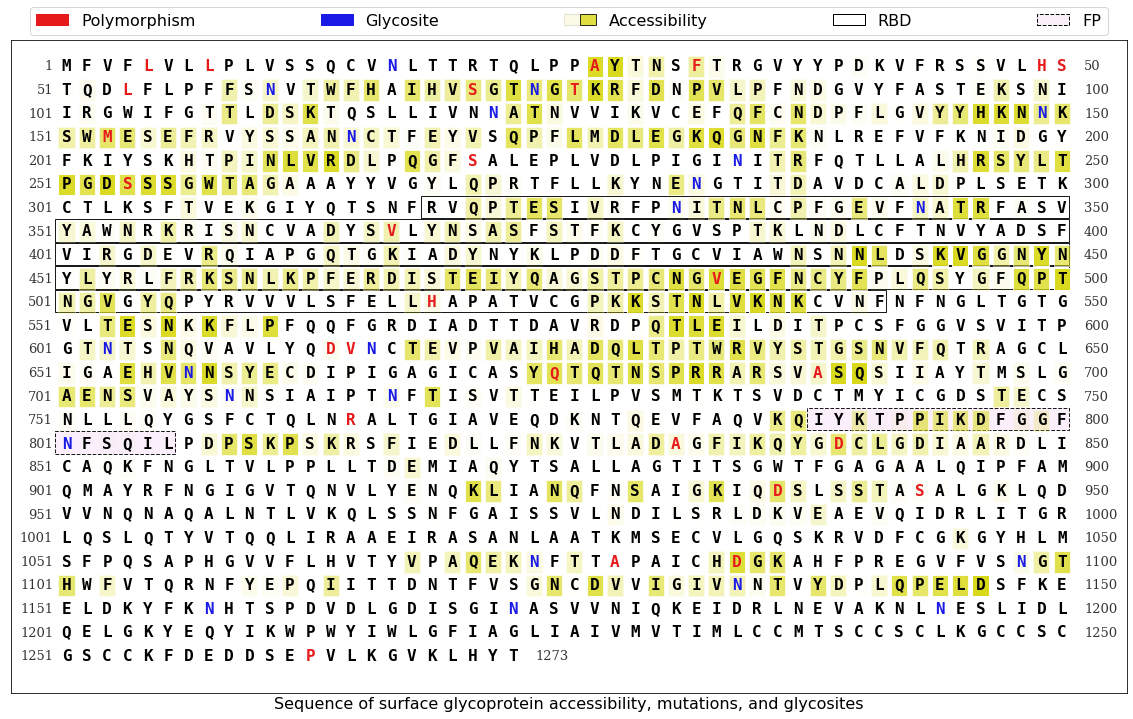

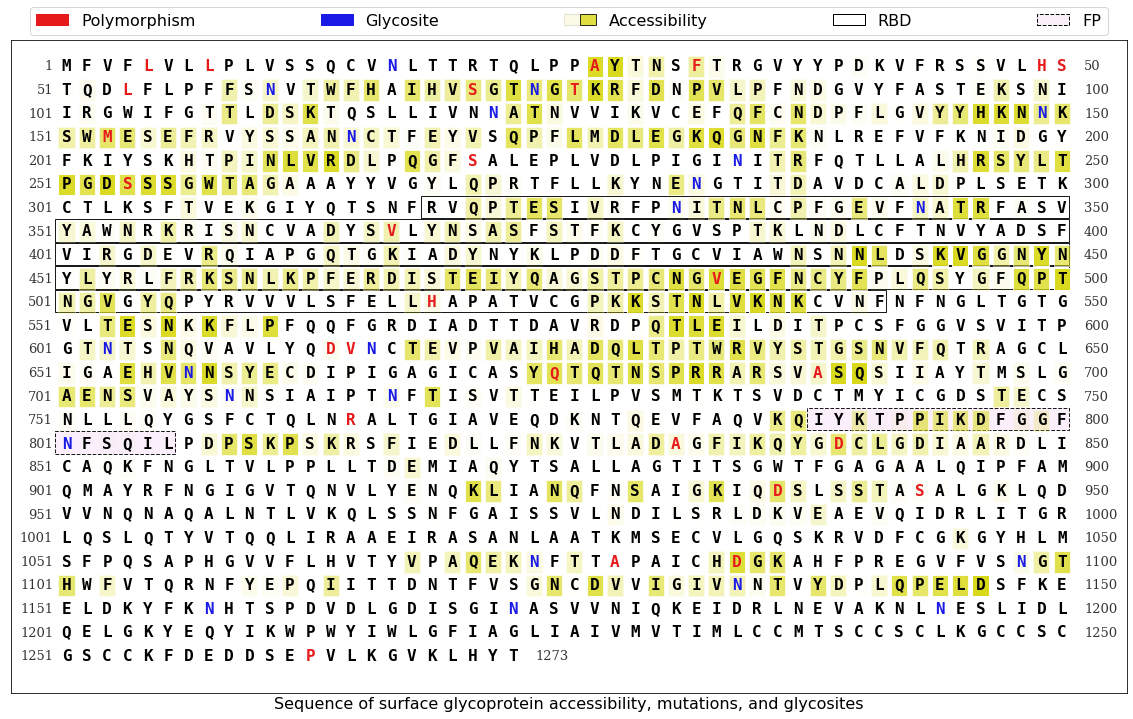

In [196]:
plot_spike_sequence(
    filename="full-spike-glycosylated-accessibility-mutations-glycosites.png",
    xlabel="Sequence of surface glycoprotein accessibility, mutations, and glycosites",
    start=1, 
    end=None,
    fontsize=16,
    figsize=(20, 12),
    letters_per_line=50,
    x_padding_left=0.05,
    x_padding_right=0.04,
    y_padding_top=0.04,
    y_padding_bottom=0.02, )



In [130]:
!open full-spike-glycosylated-accessibility-mutations-glycosites.png

In [198]:
df_sars2_S["Source"].value_counts()

Dahlke 2020     24
Charite 2020    20
Wang 2020        8
Poh 2020         2
Name: Source, dtype: int64